<a href="https://colab.research.google.com/github/Rao-Kai/dl_pytorch/blob/main/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
x = torch.arange(4).reshape(2,2)
x.shape

torch.Size([2, 2])

In [3]:
x=torch.arange(24).reshape(2,3,4)
a=2
x**a

tensor([[[  0,   1,   4,   9],
         [ 16,  25,  36,  49],
         [ 64,  81, 100, 121]],

        [[144, 169, 196, 225],
         [256, 289, 324, 361],
         [400, 441, 484, 529]]])

In [4]:
x=torch.arange(4).reshape(2,2)
x.sum(axis=0)

tensor([2, 4])

In [5]:
x=torch.tensor([1,2,3,4], dtype=torch.float32)
y=torch.ones(4, dtype=torch.float32)
z=torch.dot(x,y)  
# dot用于向量相乘
z

tensor(10.)

In [6]:
A = torch.arange(20, dtype = torch.float32).reshape(5,4)
z = torch.mv(A, y)
# mv表示矩阵和向量相乘 matrix * vector
A, y, z

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([1., 1., 1., 1.]),
 tensor([ 6., 22., 38., 54., 70.]))

In [7]:
B = torch.arange(16, dtype = torch.float32).reshape(4,4)
z = torch.mm(A, B)
z

tensor([[ 56.,  62.,  68.,  74.],
        [152., 174., 196., 218.],
        [248., 286., 324., 362.],
        [344., 398., 452., 506.],
        [440., 510., 580., 650.]])

In [8]:
z = torch.norm(x)
z

tensor(5.4772)

In [9]:
x = torch.ones(2, 5, 4)
x.shape

torch.Size([2, 5, 4])

In [10]:
x.sum().shape

torch.Size([])

In [11]:
x.sum(axis = 1).shape, x.sum(axis = 1)

(torch.Size([2, 4]), tensor([[5., 5., 5., 5.],
         [5., 5., 5., 5.]]))

In [12]:
x.sum(axis = 1, keepdims = True)

tensor([[[5., 5., 5., 5.]],

        [[5., 5., 5., 5.]]])

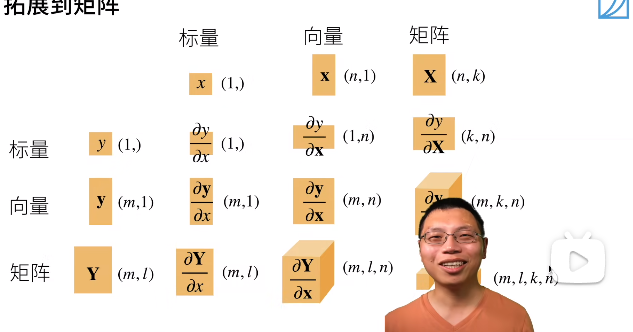

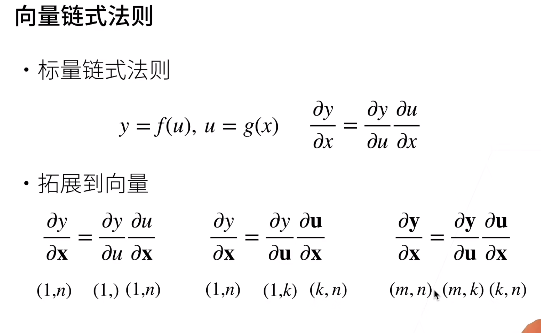

求导工具：Mathematica

另一个数学工具：maple

这两个和matlab统称为3M

In [13]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [14]:
# 需要⼀个地⽅来存储梯度
x.requires_grad_(True)
# 之后就可以通过x.grad来访问梯度
x.grad

In [15]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [16]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [17]:
# 如果没有下面这一行，x.grad会一直累积
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [18]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [19]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
x.grad

tensor([0., 1., 4., 9.])

In [20]:
x.grad.zero_()
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [21]:
def f(a):
  b = a * 2
  while b.norm() < 1000:
    b = b * 2
  if b.sum() > 0:
    c = b
    print(b)
  else:
    c = 100 * b
  return c


a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()
a, a.grad

tensor(1619.6049, grad_fn=<MulBackward0>)


(tensor(0.7908, requires_grad=True), tensor(2048.))